### Data Description

We requested permission and obtained the data from MIB researcher's database. Detailed information on the dataset can be found here: http://mib.projects.iit.cnr.it/dataset.html. When necessary, we complemented this data using Twitters API.

The original database contained multiple levels of information for each tweet coming from a given Twitter user. Some of the data was useful, some was not. We analyzed this data and removed variables that we deemed not to be necesarry for predicting whether an acocunt is a bot. A brief description of the data obtained is described in the table below which was obtained from the MIB website linked above. 

Unfortunatley, when we downloaded the data, the numbers did not match up exactly with the numbers in the table. The dataset we downloaded contained a bit over 6.6 million tweets coming from a bit over 9,700 accounts. This is still more than enough of a sample size for use to develop a model for predicting purposes.

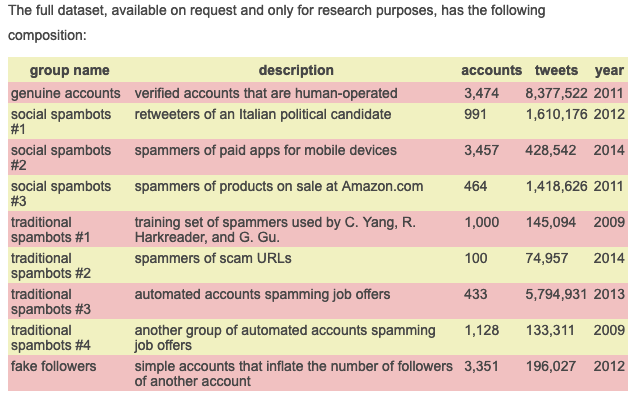

## 1. Body

### Generating a Clean Tweet Database

The datasets we obtained were not clean, it contained raw information. This task was very ardous as we are working with over 6 million observations and over 30 features for each datapoint. Additionally, some data needed to be turned into neural-network readable data in order for us to use it in our model.

The general purpose of this section of code is to clean the 'twitter.csv' files we obtained from the researchers's dataset. These sets contained a lot of information and some missing data. We handle the missing data accordingly and clean the dataset for use in the neural network. Explanations of what we did and how we proceeded is presented throughout the code itself. 

As we proceeded to clean the data, we learned new things that eventually led to the generation of new features from the data to that was used in the NN.

In [1]:
#imports used for cleaning tweet database
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

from sklearn.preprocessing import OneHotEncoder

In [2]:
#Define paths to files where data is stored

path = os.getcwd()+'/data/datasets_full/'

#the datasets were stored in separate folders containing csv files
folders = ['genuine_accounts/', 'social_spambots_1/', 'social_spambots_2/', 
           'social_spambots_3/', 'traditional_spambots_1/', 'traditional_spambots_2/',
           'traditional_spambots_3/', 'traditional_spambots_4/', 'fake_followers/']

file_names = ['users.csv', 'tweets.csv']

The data contained differing variable types for some columns which made the porcess of reading the data into a pandas dataframe difficult and slow. Here we define how some columns should be read into pandas in order to avoid warning and speed the process up a bit. 

Some columns, although numerical in nature, were coerced into strings as they are more useful in that manner. For example, columns that have a user id were changed into a string instead of an integer or float as we can use this number if we need to request information from Twitter's API.

In [3]:
#define datatype for some columns to speed up process and avoid warnings when reading raw data
type_dic = {'user_id': str, 'id': str, 'contributors': str,
            'crawled_at': str, 'in_reply_to_screen_name': str,
            'place': str, 'retweeted_status_id': str, 
            'in_reply_to_screen_name': str, 'in_reply_to_status_id': str,
            'in_reply_to_user_id': str, 'updated': str, 'created_at': str}

We then proceeded to read in the databases and append each one into a single large database. We printed the number of datapoints read from each individual database and final count of observations.

We used error handling in order to catch any errors from reading the files or in case the files did not exit. We discovered that some files were missing from the researchers data, so we just ignore these files during the reading process.

In [4]:
df = pd.DataFrame()

for f in folders:
    try:
        temp_df = pd.read_csv(path+f+file_names[1], dtype=type_dic)
        if f == 'genuine_accounts/':
            real_count = len(temp_df)
        print('File {0} has shape of: {1}'.format(f+file_names[1], temp_df.shape))
        df = df.append(temp_df, ignore_index=True, sort=True)
    except FileNotFoundError:
        print('File {:s} not found, ignoring'.format(f+file_names[1])) 

print('final tweet database is of shape {0}'.format(df.shape))

File genuine_accounts/tweets.csv has shape of: (2839362, 25)
File social_spambots_1/tweets.csv has shape of: (1610034, 25)
File social_spambots_2/tweets.csv has shape of: (428542, 25)
File social_spambots_3/tweets.csv has shape of: (1418557, 25)
File traditional_spambots_1/tweets.csv has shape of: (145094, 25)
File traditional_spambots_2/tweets.csv not found, ignoring
File traditional_spambots_3/tweets.csv not found, ignoring
File traditional_spambots_4/tweets.csv not found, ignoring
File fake_followers/tweets.csv has shape of: (196027, 23)
final tweet database is of shape (6637616, 25)


After reading, we added labels for bots (= 1) and real accounts (= 0) at this stage as we know this thanks to the work of the researchers. This was done linearly and quickly as we read the accounts in order of genuine accounts first and then all the bots.

In [5]:
bots = np.ones(len(df))
np.put(bots, list(range(real_count)), 0)
df['bots'] = bots